# Aplicación S&P500 y Naftrac


### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik}
$$

Caso dos activos $(a,b)$:

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$


$$cov(a,b) = \sigma_a \sigma_b corr(a,b) $$

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b \sigma_a \sigma_b corr(a,b)$$




### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right]  $$


Caso dos activos $(a,b)$:
$$E[r_b] = w_1 \mu_{r_1} + w_2 \mu_{r_2} $$



In [1]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'


St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%%**********************]  2 of 2 completed


### Recordando

Si tenemos rendimientos diarios y los queremos convertir anual:
$$E[r_{anual}] = E[r_i] * 252 $$

Para el caso de la volatilidad, tenemos que multiplicar por raíz de 252
$$\sigma[r_{anual}] = \sigma_{ri} * \sqrt{252} $$



In [2]:
# Calculamos los valores esperados y volatilidades individuales
df = pd.DataFrame({
    "rendimientos": rt.mean() * 252,
    "volatilidades": rt.std() * 252**(1/2)
})
df

,rendimientos,volatilidades
NAFTRAC.MX,0.064148,0.155596
VOO,0.132557,0.182122


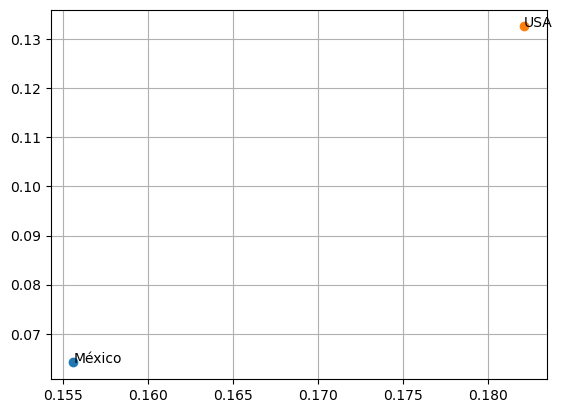

In [3]:
# Inversión en el 100% de los activos
plt.scatter(df.volatilidades[0], df.rendimientos[0])
plt.text(df.volatilidades[0], df.rendimientos[0], "México")

plt.scatter(df.volatilidades[1], df.rendimientos[1])
plt.text(df.volatilidades[1], df.rendimientos[1], "USA")

plt.grid()

# Ejemplo funciones lambda

In [4]:
# Funciones lambda
def suma(x):
    return x + 1

df1 = pd.DataFrame()
df1["numeros"] = [1, 2, 3, 4]
df1["numeros"].apply(lambda x: suma(x))

0    2
1    3
2    4
3    5
Name: numeros, dtype: int64

# ¿Cómo se verá un portafolio con diversos pesos en México y estados unidos?

In [5]:
# Correlación entre estados unidos y mexico
rt.corr()

,NAFTRAC.MX,VOO
NAFTRAC.MX,1.000000,0.506365
VOO,0.506365,1.000000


In [6]:
# Obtenemos las desviaciones estandar
s_usa = rt.VOO.std()
s_mx = rt["NAFTRAC.MX"].std()

# Obtenemos los valores esperados
e_usa = rt.VOO.mean()
e_mx = rt["NAFTRAC.MX"].mean()

# Obtenemos la covarianza de los dos ETF
correlation = rt.corr()["VOO"]["NAFTRAC.MX"]

In [7]:
# Dado unos pesos w1 y w2, calcular la varianza de un protafolio
df = pd.DataFrame()
df["w"] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [8]:
# Valor esperado
def expected_value(df, e1, e2):
    w_usa = df["w"]
    w_mx = 1 - w_usa
    rendimiento = w_usa * e1 + w_mx * e2
    return rendimiento

# Volatilidad usando la correlación
def volatility_correlation(df, s_usa, s_mx, correlation):
    w_usa = df["w"]
    w_mx = 1 - w_usa
    varianza_port = w_usa**2 * s_usa**2 + w_mx**2 * s_mx**2 + 2 * w_usa * w_mx * s_usa * s_mx * correlation
    volatilidad = varianza_port**(1/2)
    return volatilidad

In [9]:
# Obtenemos el valor esperado y la volatilidad anualizadas con una función lambda
df['rendimientos'] = df.apply(lambda x: expected_value(x, e_usa, e_mx), axis=1)
df['volatilidad'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, correlation), axis=1)

# Imprimir data frame
df["rendimientos"] = df["rendimientos"] * 252
df["volatilidad"] = df["volatilidad"] * 252**(1/2)

In [10]:
df['volatilidad_corr0'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 0), axis=1) * 252**(1/2)
df['volatilidad_corr1'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 1), axis=1) * 252**(1/2)
df['volatilidad_corr-1'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, -1), axis=1) * 252**(1/2)

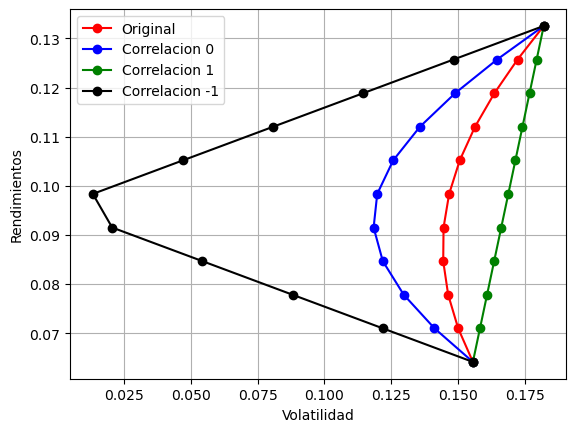

In [11]:
plt.plot(df.volatilidad, df.rendimientos, marker ="o", color="red", label ="Original")
plt.xlabel("Volatilidad")
plt.ylabel("Rendimientos")
plt.grid()
#Correlaciones distintas
plt.plot(df["volatilidad_corr0"], df.rendimientos, marker="o", color="blue", label="Correlacion 0")
plt.plot(df["volatilidad_corr1"], df.rendimientos, marker="o", color="green", label="Correlacion 1")
plt.plot(df["volatilidad_corr-1"], df.rendimientos, marker="o", color="black", label="Correlacion -1")

plt.legend()

Text(0, 0.5, 'Expected value')

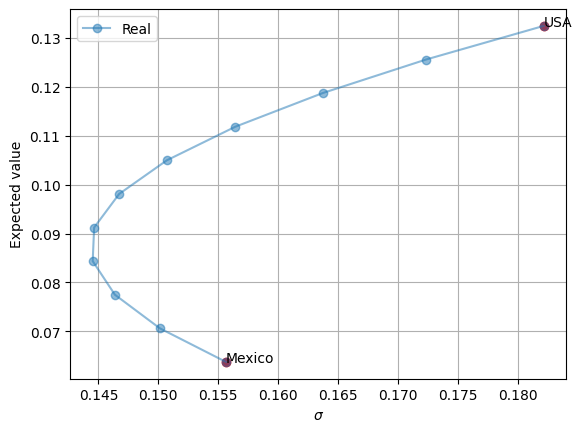

In [ ]:
# ¿Cuál es el portafoio con varianza mínima?
# Inversión en el 100% de los activos
plt.plot(df.volatility, df.expected_value, marker="o", alpha=0.5, label='Real')
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="red", label="")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'Mexico')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'USA')
plt.legend(loc='best')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

In [ ]:
# ¿Cual es el porfafgolio de minima varianza?
df_min_var = df[df.volatility == df.volatility.min()]

Text(0, 0.5, 'Expected value')

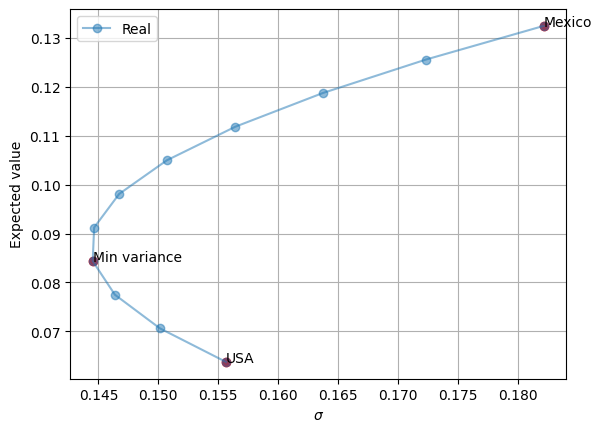

In [ ]:
# ¿Cuál es el portafoio con varianza mínima?
# Inversión en el 100% de los activos
plt.plot(df.volatility, df.expected_value, marker="o", alpha=0.5, label='Real')
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="red", label="")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'USA')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'Mexico')
plt.scatter(df_min_var.volatility, df_min_var.expected_value, c="red")
plt.text(df_min_var.volatility, df_min_var.expected_value, "Min variance")

plt.legend(loc='best')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")

# Obtener el portafolio de minima varianza de forma analitica  
$$w_a = \frac{\sigma_b^2 - cov(a,b)}{\sigma_a^2 + \sigma_b^2 - 2 cov(a,b)}$$


In [ ]:
sigma_eua = rt['VOO'].std()
sigma_mx = rt['NAFTRAC.MX'].std()
cov_mx_usa = rt.cov().values[0][1]

w_usa_min_variance  = (sigma_mx ** 2 - cov_mx_usa) / (sigma_eua**2 + sigma_mx **2 - 2*cov_mx_usa)
w_mx_min_variance = 1 - w_usa_min_variance
(w_usa_min_variance, w_mx_min_variance)

(0.2547192024851532, 0.7452807975148468)

# Combinando distintos tipos de correlación

Ilustrar gráficamente como se vería el portafolio correlacion de 0, -1, 1 y la real


In [ ]:
# Crear columna con correlación 0
df['volatility_correlation_0'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 0), axis=1) * 252**0.5
# Crear columna con correlación 1
df['volatility_correlation_1'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, 1), axis=1) * 252**0.5
# Crear columna con correlación -1
df['volatility_correlation_minus_1'] =  df.apply(lambda x: volatility_correlation(x, s_usa, s_mx, -1), axis=1) * 252**0.5


Text(0, 0.5, 'Expected value')

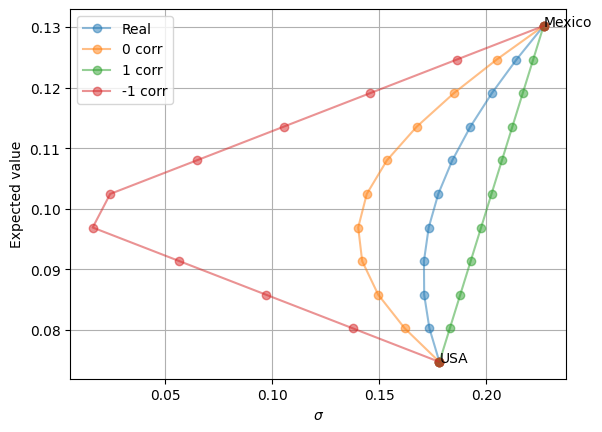

In [ ]:
# Poner todo en un mismo gráfico
plt.plot(df.volatility, df.expected_value, marker="o", alpha=0.5, label='Real')
plt.plot(df.volatility_correlation_0, df.expected_value, marker="o", alpha=0.5, label='0 corr')
plt.plot(df.volatility_correlation_1, df.expected_value, marker="o", alpha=0.5, label='1 corr')
plt.plot(df.volatility_correlation_minus_1, df.expected_value, marker="o", alpha=0.5, label = '-1 corr')
plt.scatter(df_one_portafolio.volatility, df_one_portafolio.expected_value, c="red", label="")
plt.text(df_one_portafolio.volatility[0], df_one_portafolio.expected_value[0], 'USA')
plt.text(df_one_portafolio.volatility[1], df_one_portafolio.expected_value[1], 'Mexico')
plt.legend(loc='best')
plt.grid()
plt.xlabel("$\sigma$")
plt.ylabel("Expected value")